# Data Acquisition using Realsense
(04/08/2023)
** run the cell below everytime**

In [1]:
%run Mylib_import.ipynb
import pyrealsense2 as rs
import cv2
import numpy as np

#Realsense cameras serial number
D435i_sn = '841512070605' #D435i
L515_sn = 'f0352346' #L515

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# 1.1 Displaying L515 and D435i "COLOR" frames 
- don't forget to put the actual serial number in '.enable_device()'
- don't forget to put the appropriate frame size for both camera in '.enable_stream' (in this case I select [640,480] ) 

In [256]:
# Create pipeline objects for both cameras
pipeline_l515 = rs.pipeline()
config_l515 = rs.config()
config_l515.enable_device(L515_sn)  # Replace with the actual serial number
config_l515.enable_stream(rs.stream.color, 640, 480, rs.format.rgb8, 30)  # Color stream
pipeline_l515.start(config_l515)

pipeline_d435i = rs.pipeline()
config_d435i = rs.config()
config_d435i.enable_device(D435i_sn)  # Replace with the actual serial number
config_d435i.enable_stream(rs.stream.color, 640, 480, rs.format.rgb8, 30)  # Color stream
pipeline_d435i.start(config_d435i)

try:
    while True:
        # Wait for frames from both cameras
        frames_l515 = pipeline_l515.wait_for_frames()
        frames_d435i = pipeline_d435i.wait_for_frames()

        # Convert frames to numpy arrays
        color_frame_l515 = frames_l515.get_color_frame()
        color_frame_d435i = frames_d435i.get_color_frame()

        if not color_frame_l515 or not color_frame_d435i:
            continue

        # Convert frames to numpy arrays
        color_image_l515 = np.asanyarray(color_frame_l515.get_data())
        color_image_d435i = np.asanyarray(color_frame_d435i.get_data())
        
        # Convert color frames to RGB format
        color_image_l515_rgb = cv2.cvtColor(color_image_l515, cv2.COLOR_BGR2RGB)
        color_image_d435i_rgb = cv2.cvtColor(color_image_d435i, cv2.COLOR_BGR2RGB)

        # Resize frames to the same dimensions
        height = min(color_image_l515.shape[0], color_image_d435i.shape[0])
        width = min(color_image_l515.shape[1], color_image_d435i.shape[1])
        color_image_l515 = cv2.resize(color_image_l515_rgb, (width, height))
        color_image_d435i = cv2.resize(color_image_d435i_rgb, (width, height))

        # Combine the frames side by side
        combined_frames = np.hstack((color_image_l515, color_image_d435i))

        # Display the combined frames
        cv2.imshow('Combined Cameras', combined_frames)

        # Exit the loop on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

except KeyboardInterrupt:
    pass
finally:
    pipeline_l515.stop()
    pipeline_d435i.stop()
    cv2.destroyAllWindows()

# 1.2 Displaying L515 and D435i "DEPTH" frames 

In [48]:
pipeline_l515 = rs.pipeline()
config_l515 = rs.config()
config_l515.enable_device(L515_sn)  # Replace with the actual serial number
config_l515.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)  # Depth stream
pipeline_l515.start(config_l515)

pipeline_d435i = rs.pipeline()
config_d435i = rs.config()
config_d435i.enable_device(D435i_sn)  # Replace with the actual serial number
config_d435i.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)  # Depth stream
pipeline_d435i.start(config_d435i)

try:
    while True:
        # Wait for frames from both cameras
        frames_l515 = pipeline_l515.wait_for_frames()
        frames_d435i = pipeline_d435i.wait_for_frames()

        # Convert frames to numpy arrays
        depth_frame_l515 = frames_l515.get_depth_frame()
        depth_frame_d435i = frames_d435i.get_depth_frame()

        if not depth_frame_l515 or not depth_frame_d435i:
            continue

        # Convert frames to numpy arrays
        depth_image_l515  = np.asanyarray(depth_frame_l515.get_data())
        depth_image_d435i = np.asanyarray(depth_frame_d435i.get_data())
        
        # Apply proper color mapping to depth frames
        depth_colormap_l515 = cv2.applyColorMap(cv2.convertScaleAbs(depth_image_l515, alpha=0.02), cv2.COLORMAP_JET)
        depth_colormap_d435i = cv2.applyColorMap(cv2.convertScaleAbs(depth_image_d435i, alpha=0.1), cv2.COLORMAP_JET)
        
        # Resize frames to the same dimensions
        height = min(depth_image_l515.shape[0], depth_image_d435i.shape[0])
        width = min(depth_image_l515.shape[1], depth_image_d435i.shape[1])
        depth_image_l515 = cv2.resize(depth_colormap_l515, (width, height))
        depth_image_d435i = cv2.resize(depth_colormap_d435i, (width, height))

        # Combine the frames side by side
        combined_frames = np.hstack((depth_image_l515, depth_image_d435i))

        # Display the combined frames
        cv2.imshow('Combined Cameras', combined_frames)

        # Exit the loop on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            

except KeyboardInterrupt:
    pass
finally:
    pipeline_l515.stop()
    pipeline_d435i.stop()
    cv2.destroyAllWindows()

# 2. Export both depth and color frames

- display depth and color frame for both cameras (as combined_frames)
- export combined_frames
- export depth and color data from both cameras

# 2.1 start with create directories

In [5]:
#main save directories
dir_main = "D:/Users/msari/realsense_export_frame"

# folname_new = input()
folname_new = 'testfol'
create_folder(dir_main +'/'+ folname_new)

#color, depth frames export
dir_color = dir_main + '/'+ folname_new + '/color'
dir_depth = dir_main + '/'+ folname_new + '/depth'
dir_vis = dir_main + '/'+ folname_new + '/vis'
dir_pcd = dir_main + '/'+ folname_new + '/pcd'
create_folder(dir_color)
create_folder(dir_depth)
create_folder(dir_vis)
create_folder(dir_pcd)

#create results folder
create_folder(dir_color+'/l515')
create_folder(dir_depth+'/l515')
create_folder(dir_pcd+'/l515')
create_folder(dir_color+'/d435i')
create_folder(dir_depth+'/d435i')
create_folder(dir_pcd+'/d435i')
dir_pcd

Folder 'D:/Users/msari/realsense_export_frame/testfol' already exists.
Folder 'D:/Users/msari/realsense_export_frame/testfol/color' already exists.
Folder 'D:/Users/msari/realsense_export_frame/testfol/depth' already exists.
Folder 'D:/Users/msari/realsense_export_frame/testfol/vis' already exists.
Folder 'D:/Users/msari/realsense_export_frame/testfol/pcd' already exists.
Folder 'D:/Users/msari/realsense_export_frame/testfol/color/l515' already exists.
Folder 'D:/Users/msari/realsense_export_frame/testfol/depth/l515' already exists.
Folder 'D:/Users/msari/realsense_export_frame/testfol/pcd/l515' already exists.
Folder 'D:/Users/msari/realsense_export_frame/testfol/color/d435i' already exists.
Folder 'D:/Users/msari/realsense_export_frame/testfol/depth/d435i' already exists.
Folder 'D:/Users/msari/realsense_export_frame/testfol/pcd/d435i' already exists.


'D:/Users/msari/realsense_export_frame/testfol/pcd'

# 2.2 run for Export frames

In [3]:
pipeline_l515 = rs.pipeline()
config_l515 = rs.config()
config_l515.enable_device(L515_sn)  # Replace with the actual serial number
config_l515.enable_stream(rs.stream.color, 640, 480, rs.format.rgb8, 30)  # Color stream
config_l515.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)  # Depth stream
pipeline_l515.start(config_l515)

pipeline_d435i = rs.pipeline()
config_d435i = rs.config()
config_d435i.enable_device(D435i_sn)  # Replace with the actual serial number
config_d435i.enable_stream(rs.stream.color, 640, 480, rs.format.rgb8, 30)  # Color stream
config_d435i.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)  # Depth stream
pipeline_d435i.start(config_d435i)


frame_count = 0
try:
    while True:
        # Wait for frames from both cameras
        frames_l515 = pipeline_l515.wait_for_frames()
        frames_d435i = pipeline_d435i.wait_for_frames()

        # get frames
        color_frame_l515 = frames_l515.get_color_frame()
        color_frame_d435i = frames_d435i.get_color_frame()
        depth_frame_l515 = frames_l515.get_depth_frame()
        depth_frame_d435i = frames_d435i.get_depth_frame()

        if not color_frame_l515 or not depth_frame_l515 or not color_frame_d435i or not depth_frame_d435i:
            continue

        # Convert frames to numpy arrays
        color_image_l515 = np.asanyarray(color_frame_l515.get_data())
        color_image_d435i = np.asanyarray(color_frame_d435i.get_data())
        depth_image_l515  = np.asanyarray(depth_frame_l515.get_data())
        depth_image_d435i = np.asanyarray(depth_frame_d435i.get_data())
        
        # Convert color frames to RGB format
        color_image_l515_rgb = cv2.cvtColor(color_image_l515, cv2.COLOR_BGR2RGB)
        color_image_d435i_rgb = cv2.cvtColor(color_image_d435i, cv2.COLOR_BGR2RGB)
        
        # Apply proper color mapping to depth frames
        depth_colormap_l515 = cv2.applyColorMap(cv2.convertScaleAbs(depth_image_l515, alpha=0.02), cv2.COLORMAP_JET)
        depth_colormap_d435i = cv2.applyColorMap(cv2.convertScaleAbs(depth_image_d435i, alpha=0.1), cv2.COLORMAP_JET)
        

        # Resize frames to the same dimensions
        height = min(color_image_l515.shape[0], color_image_d435i.shape[0])
        width = min(color_image_l515.shape[1], color_image_d435i.shape[1])
        resized_color_image_l515 = cv2.resize(color_image_l515_rgb, (width, height))
        resized_color_image_d435i = cv2.resize(color_image_d435i_rgb, (width, height))
        resized_depth_image_l515 = cv2.resize(depth_colormap_l515, (width, height))
        resized_depth_image_d435i = cv2.resize(depth_colormap_d435i, (width, height))

        # Combine the frames side by side
        combined_frames_top = np.hstack((resized_color_image_l515, resized_color_image_d435i))
        combined_frames_bottom = np.hstack((resized_depth_image_l515, resized_depth_image_d435i))
        combined_frames = np.vstack((combined_frames_top, combined_frames_bottom))
        
        # Display the combined frames
        cv2.imshow('Combined Cameras', combined_frames)
        
        #write the results
        frame_count += 1
        cv2.imwrite(os.path.join(f'{dir_color}/l515/rgb_{frame_count}.png'), color_image_l515_rgb)
        cv2.imwrite(os.path.join(f'{dir_color}/d435i/rgb_{frame_count}.png'), color_image_d435i_rgb)
        cv2.imwrite(os.path.join(f'{dir_depth}/l515/realdepth_{frame_count}.png'), depth_image_l515)
        cv2.imwrite(os.path.join(f'{dir_depth}/d435i/realdepth_{frame_count}.png'), depth_image_d435i)
        cv2.imwrite(os.path.join(f'{dir_depth}/l515/depthcolormap_{frame_count}.png'), depth_colormap_l515)
        cv2.imwrite(os.path.join(f'{dir_depth}/d435i/depthcolormap_{frame_count}.png'), depth_colormap_d435i)
        
        cv2.imwrite(os.path.join(f'{dir_vis}/combined_frames_{frame_count}.png'), combined_frames)

        
        # Exit the loop on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

except KeyboardInterrupt:
    pass
finally:
    pipeline_l515.stop()
    pipeline_d435i.stop()
    cv2.destroyAllWindows()

##################################################################### 

# 3. Real-time Point cloud

# 3.1 Get camera intrinsics and extrinsics

In [3]:
%run Mylib_import.ipynb
import pyrealsense2 as rs
import numpy as np
import open3d as o3d

L515_sn = 'f0352346' # L515 serial number
D435i_sn = '841512070605' # D435i serial number

# Intrinsic(color, depth) parameters for both camera
print("L515")
intrinsics_color_l515, intrinsics_depth_l515 = get_camera_intrinsics(L515_sn)
print("-----------------------------------------------")
print("D435i")
intrinsics_color_d435i, intrinsics_depth_d435i = get_camera_intrinsics(D435i_sn)

print("===============================================")
# Extrinsic parametersfrom depth to RGB
extrinsics_l515 = get_depth_to_color_extrinsics(L515_sn)
T_extrinsics_l515 = rt_to_T(extrinsics_l515.rotation, extrinsics_l515.translation)
extrinsics_d435i = get_depth_to_color_extrinsics(D435i_sn)
T_extrinsics_d435i = rt_to_T(extrinsics_d435i.rotation, extrinsics_d435i.translation)
print("Extrinsics depth to RGB")
print("\nL515 Extrinsic Parameters:")
print("Rotation:", extrinsics_l515.rotation)
print("Translation:", extrinsics_l515.translation)

print("\nD435i Extrinsic Parameters:")
print("Rotation:", extrinsics_d435i.rotation)
print("Translation:", extrinsics_d435i.translation)

L515

Intrinsics for Color Stream:
Width: 640
Height: 480
Fx: 598.6168212890625
Fy: 598.872802734375
Cx: 327.2628173828125
Cy: 236.33897399902344

Intrinsics for Depth Stream:
Width: 640
Height: 480
Fx: 457.2109375
Fy: 457.37109375
Cx: 326.22265625
Cy: 254.140625
-----------------------------------------------
D435i

Intrinsics for Color Stream:
Width: 640
Height: 480
Fx: 610.1497802734375
Fy: 610.046875
Cx: 325.07672119140625
Cy: 236.75025939941406

Intrinsics for Depth Stream:
Width: 640
Height: 480
Fx: 382.2268371582031
Fy: 382.2268371582031
Cx: 321.1048278808594
Cy: 244.42872619628906
Extrinsics depth to RGB

L515 Extrinsic Parameters:
Rotation: [0.9999656677246094, -0.005148336756974459, -0.006493162829428911, 0.004973599221557379, 0.9996325373649597, -0.02664593979716301, 0.006627959199249744, 0.02661273069679737, 0.9996238350868225]
Translation: [-0.0004578053776640445, 0.014150156639516354, -0.003066536970436573]

D435i Extrinsic Parameters:
Rotation: [0.9999301433563232, 0.010

# 3.2.1 Try running Real-time
# ***rgb texture and depth alignment is still not correct 

In [10]:
import pyrealsense2 as rs
import numpy as np
import open3d as o3d

# Create pipeline and config for L515
pipeline_l515 = rs.pipeline()
config_l515 = rs.config()
config_l515.enable_device(L515_sn)  # Replace with the actual serial number
config_l515.enable_stream(rs.stream.color, 640, 480, rs.format.rgb8, 30)  # Color stream
config_l515.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)  #320,240 # Depth stream
pipeline_l515.start(config_l515) 

# Create pipeline and config for D435i
pipeline_d435i = rs.pipeline()
config_d435i = rs.config()
config_d435i.enable_device(D435i_sn)  # Replace with the actual serial number
config_d435i.enable_stream(rs.stream.color, 640, 480, rs.format.rgb8, 30)  # Color stream
config_d435i.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)  # Depth stream
pipeline_d435i.start(config_d435i)


# Create Open3D visualizer with adjusted window size
wd = 800  # Set the desired width
ht = 600  # Set the desired height
vis = o3d.visualization.Visualizer()
vis.create_window(width=wd, height=ht)

# Define rotation angle (in degrees)
rotation_angle_horizontal = 0.0


# Define the correct depth scale for each camera
depth_scale_l515 = 1000#1000
depth_scale_d435i = 1000#1000
depth_trunc_l515 = 4.0
depth_trunc_d435i = 1.0

try:
    frame_number = 0
    while True:
        # Wait for frames from L515
        frames_l515 = pipeline_l515.wait_for_frames()
        color_frame_l515 = frames_l515.get_color_frame()
        depth_frame_l515 = frames_l515.get_depth_frame()

        # Wait for frames from D435i
        frames_d435i = pipeline_d435i.wait_for_frames()
        color_frame_d435i = frames_d435i.get_color_frame()
        depth_frame_d435i = frames_d435i.get_depth_frame()

        # Convert depth frames to arrays
        depth_array_l515 = np.asarray(depth_frame_l515.get_data())
        depth_array_d435i = np.asarray(depth_frame_d435i.get_data())
        
        #depth JETcolormap(for visualize)
        depth_colormap_l515 = cv2.applyColorMap(cv2.convertScaleAbs(depth_array_l515, alpha=0.02), cv2.COLORMAP_JET)
        depth_colormap_d435i = cv2.applyColorMap(cv2.convertScaleAbs(depth_array_d435i, alpha=0.1), cv2.COLORMAP_JET)
        
        # Get color frames as numpy arrays (also resize L515?)
        color_array_l515 = np.asarray(color_frame_l515.get_data())
        #color_array_l515 = cv2.resize(color_array_l515, (depth_array_l515.shape[1], depth_array_l515.shape[0]))
        color_array_d435i = np.asarray(color_frame_d435i.get_data())
        
         #Create RGBD images
        rgbd_image_l515 = o3d.geometry.RGBDImage.create_from_color_and_depth(
            o3d.geometry.Image(color_array_l515.astype(np.uint8)),
            o3d.geometry.Image(depth_array_l515.astype(np.uint16)),
#             depth_scale=depth_scale_l515, 
            depth_trunc=depth_trunc_l515, 
            convert_rgb_to_intensity=False)
        rgbd_image_d435i = o3d.geometry.RGBDImage.create_from_color_and_depth(
            o3d.geometry.Image(color_array_d435i.astype(np.uint8)),
            o3d.geometry.Image(depth_array_d435i.astype(np.uint16)),
#             depth_scale=depth_scale_d435i, depth_trunc=depth_trunc_d435i, 
            convert_rgb_to_intensity=False)
    
        
        # Create a PinholeCameraIntrinsic object
        Intrin_color_l515 = o3d.camera.PinholeCameraIntrinsic() 
        Intrin_color_d435i = o3d.camera.PinholeCameraIntrinsic()
        
        # Set the intrinsic parameters
        Intrin_color_l515.set_intrinsics(
            intrinsics_color_l515.width, # Image width in pixels
            intrinsics_color_l515.height, # Image height in pixels
            intrinsics_color_l515.fx, # Focal length in x-direction (horizontal) in pixels
            intrinsics_color_l515.fy, # Focal length in y-direction (vertical) in pixels
            intrinsics_color_l515.ppx, # Principal point x-coordinate in pixels
            intrinsics_color_l515.ppy) # Principal point y-coordinate in pixels
        
        Intrin_color_d435i.set_intrinsics(
            intrinsics_color_d435i.width,
            intrinsics_color_d435i.height, 
            intrinsics_color_d435i.fx, 
            intrinsics_color_d435i.fy, 
            intrinsics_color_d435i.ppx,
            intrinsics_color_d435i.ppy)
        
        pcd_l515 = o3d.geometry.PointCloud.create_from_rgbd_image(
            rgbd_image_l515, Intrin_color_l515, extrinsic=T_extrinsics_l515)
        pcd_d435i = o3d.geometry.PointCloud.create_from_rgbd_image(
            rgbd_image_d435i, Intrin_color_d435i, extrinsic=T_extrinsics_d435i)

        pcd_combined = pcd_l515 + pcd_d435i

        # Apply rotation transformations
        rotation_matrix_horizontal = np.array([[np.cos(np.radians(rotation_angle_horizontal)), 0, -np.sin(np.radians(rotation_angle_horizontal)), 0],
                                               [0, 1, 0, 0],
                                               [np.sin(np.radians(rotation_angle_horizontal)), 0, np.cos(np.radians(rotation_angle_horizontal)), 0],
                                               [0, 0, 0, -1]])
        pcd_combined.transform(rotation_matrix_horizontal)
        

        # Update the Open3D visualizer
        vis.clear_geometries()
        vis.add_geometry(pcd_combined)
        vis.poll_events()
        vis.update_renderer()
        
        #EXPORT
        # Export point cloud to PLY file
        pcd_filename_l515 = f'{dir_pcd}/l515/realdepth_{frame_number}.ply'
        rgb_filename_l515 = f'{dir_color}/l515/rgb_{frame_number}.png'
        depth_filename_l515 = f'{dir_depth}/l515/realdepth_{frame_number}.png'
        depthJET_filename_l515 = f'{dir_depth}/l515/depthcolormap_{frame_number}.png'
        o3d.io.write_point_cloud(pcd_filename_l515, pcd_l515)
        cv2.imwrite(rgb_filename_l515, cv2.cvtColor(color_array_l515, cv2.COLOR_BGR2RGB))
        cv2.imwrite(depth_filename_l515, depth_array_l515.astype(np.uint16))
        cv2.imwrite(depthJET_filename_l515, depth_colormap_l515)
        
        pcd_filename_d435i = f'{dir_pcd}/d435i/realdepth_{frame_number}.ply'
        rgb_filename_d435i = f'{dir_color}/d435i/rgb_{frame_number}.png'
        depth_filename_d435i = f'{dir_depth}/d435i/realdepth_{frame_number}.png'
        depthJET_filename_d435i = f'{dir_depth}/d435i/depthcolormap_{frame_number}.png'
        o3d.io.write_point_cloud(pcd_filename_d435i, pcd_d435i)
        cv2.imwrite(rgb_filename_d435i, cv2.cvtColor(color_array_d435i, cv2.COLOR_BGR2RGB))
        cv2.imwrite(depth_filename_d435i, depth_array_d435i.astype(np.uint16))
        cv2.imwrite(depthJET_filename_d435i, depth_colormap_d435i)
        
        frame_number += 1

finally:
    pipeline_l515.stop()
    pipeline_d435i.stop()
    vis.destroy_window()


KeyboardInterrupt: 

In [7]:
o3d.visualization.draw_geometries([pcd_l515.transform(rotation_matrix_horizontal)],width=wd, height=ht)
o3d.visualization.draw_geometries([pcd_d435i.transform(rotation_matrix_horizontal)],width=wd, height=ht)

# 3.2.2 Aligned color-depth images
(for double check the color position)

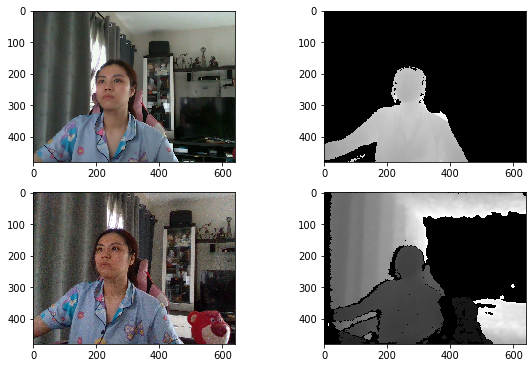

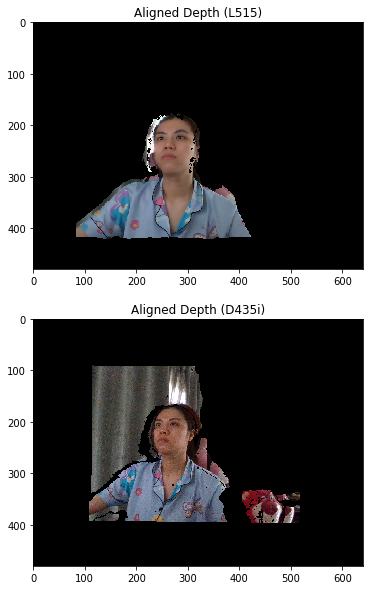

In [8]:
%run Mylib_import.ipynb

#plot rgb and depth
fig4, axs4 = plt.subplots(2, 2, figsize=(8,5), constrained_layout=True)
axs4[0,0].imshow(np.asarray(rgbd_image_l515.color))
axs4[0,1].imshow(np.asarray(rgbd_image_l515.depth), cmap="gray")
axs4[1,0].imshow(np.asarray(rgbd_image_d435i.color))
axs4[1,1].imshow(np.asarray(rgbd_image_d435i.depth), cmap="gray")

# Assuming rgbd_image_l515 and rgbd_image_d435i are Open3D RGBDImage objects
depth515 = 0.07 #0.07 #adjusted by 
depth435 = 0.75 #0.75
aligned_depth_l515 = align_depth_to_color(rgbd_image_l515.depth, rgbd_image_l515.color, intrinsics_depth_l515, intrinsics_color_l515, T_extrinsics_l515,depth515)
aligned_depth_d435i = align_depth_to_color(rgbd_image_d435i.depth, rgbd_image_d435i.color, intrinsics_depth_d435i, intrinsics_color_d435i, T_extrinsics_d435i,depth435)

# Plot the aligned depth images
fig, axs = plt.subplots(2, 1, figsize=(20,10))
axs[0].imshow(aligned_depth_l515, cmap="gray")
axs[0].set_title("Aligned Depth (L515)")
axs[1].imshow(aligned_depth_d435i, cmap="gray")
axs[1].set_title("Aligned Depth (D435i)")
plt.show()

# For edit

In [9]:
# Assuming aligned_depth_l515 and aligned_depth_d435i are aligned depth images
# Create Open3D PointCloud objects from the aligned depth images
rgbd_image_l5150 = o3d.geometry.RGBDImage.create_from_color_and_depth(
    o3d.geometry.Image(aligned_depth_l515.astype(np.uint8)),
    o3d.geometry.Image(depth_array_l515.astype(np.uint16)),
    depth_scale=depth_scale_l515, depth_trunc=depth_trunc_l515, 
    convert_rgb_to_intensity=False)
rgbd_image_d435i0 = o3d.geometry.RGBDImage.create_from_color_and_depth(
    o3d.geometry.Image(aligned_depth_d435i.astype(np.uint8)),
    o3d.geometry.Image(depth_array_d435i.astype(np.uint16)),
    depth_scale=depth_scale_d435i, depth_trunc=depth_trunc_d435i, 
    convert_rgb_to_intensity=False)

pcd_l5150 = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image_l5150, Intrin_color_l515)
pcd_d435i0 = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image_d435i0, Intrin_color_d435i)


rotation_mat= np.array([[np.cos(np.radians(rotation_angle_horizontal)), 0, -np.sin(np.radians(rotation_angle_horizontal)), 0],
                                               [0, 1, 0, 0],
                                               [np.sin(np.radians(rotation_angle_horizontal)), 0, np.cos(np.radians(rotation_angle_horizontal)), 0],
                                               [0, 0, 0, -1]])
# Visualize the point clouds
vis = o3d.visualization.Visualizer()
vis.create_window(width=800, height=600)

vis.add_geometry(pcd_l5150.transform(rotation_mat))
vis.add_geometry(pcd_d435i0.transform(rotation_mat))
vis.run()
vis.destroy_window()